In [ ]:
!pip install -qq kmodes==0.12.2

In [ ]:
import pandas as pd
from kmodes.kmodes import KModes
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/work/Credit_Card_Churn_Intern_BCC_2024/Dataset/BankChurners.csv')
df.drop(columns=['CLIENTNUM','Avg_Open_To_Buy','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)

In [ ]:
# df = pd.get_dummies(df, columns=['Gender', 'Marital_Status'], drop_first=True)

# df['Education_Level'] = df['Education_Level'].map({'Uneducated': 0, 'High School': 1, 'Unknown': 2, 'College': 3, 'Graduate': 4, 'Post-Graduate':5, 'Doctorate': 6})
# df['Income_Category'] = df['Income_Category'].map({'Less than $40K': 0, '$40K - $60K': 1, 'Unknown': 2,'$60K - $80K': 3, '$80K - $120K': 4, '$120K +': 5})
# df['Card_Category'] = df['Card_Category'].map({'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3})
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

In [ ]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,0.703,15476,117,0.857,0.462
10123,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,0.804,8764,69,0.683,0.511
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,0.819,10291,60,0.818,0.000
10125,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,0.535,8395,62,0.722,0.000


In [ ]:
cat_df = df[['Gender','Education_Level','Income_Category', 'Marital_Status']]

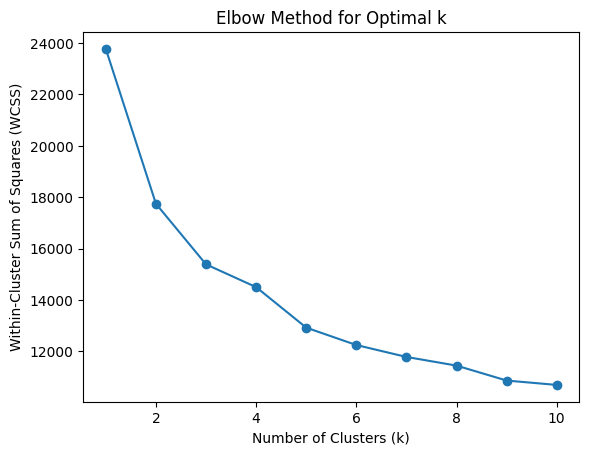

In [ ]:
k_values = range(1, 11)
wcss = []

# Calculate the within-cluster sum of squares for different values of k
for k in k_values:
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    km.fit_predict(cat_df)
    wcss.append(km.cost_)

# Plot the elbow graph
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)

# Fit the model to your data
clusters = km.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2778, cost: 126300.0
Run 1, iteration: 2/100, moves: 124, cost: 126300.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2867, cost: 125917.0
Run 2, iteration: 2/100, moves: 828, cost: 125911.0
Run 2, iteration: 3/100, moves: 2, cost: 125911.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3306, cost: 126077.0
Run 3, iteration: 2/100, moves: 947, cost: 126076.0
Run 3, iteration: 3/100, moves: 1, cost: 126076.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3970, cost: 125486.0
Run 4, iteration: 2/100, moves: 1674, cost: 124540.0
Run 4, iteration: 3/100, moves: 1009, cost: 124226.0
Run 4, iteration: 4/100, moves: 97, cost: 124226.0
Init: initializing centroids
Init: initializing cluster

In [ ]:
df['Cluster'] = clusters

# Calculate the mode for each cluster
cluster_profiles = df.groupby('Cluster')[['Gender','Education_Level','Income_Category','Marital_Status']].agg(lambda x: x.mode().iloc[0]).reset_index()

# Display the cluster profiles
print("Cluster Profiles:")
print(cluster_profiles)

Cluster Profiles:
   Cluster Gender Education_Level Income_Category Marital_Status
0        0      M        Graduate    $80K - $120K        Married
1        1      M     High School    $80K - $120K         Single
2        2      F        Graduate  Less than $40K        Married
3        3      F     High School  Less than $40K        Married
4        4      F        Graduate  Less than $40K         Single


In [ ]:
numeric_columns = [
    # "Customer_Age",
    # "Dependent_count",
    # "Months_on_book",
    # "Total_Relationship_Count",
    # "Months_Inactive_12_mon",
    # "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    # "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    # "Total_Ct_Chng_Q4_Q1",
    # "Avg_Utilization_Ratio"
]

/tmp/ipykernel_142/1752792938.py:11: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




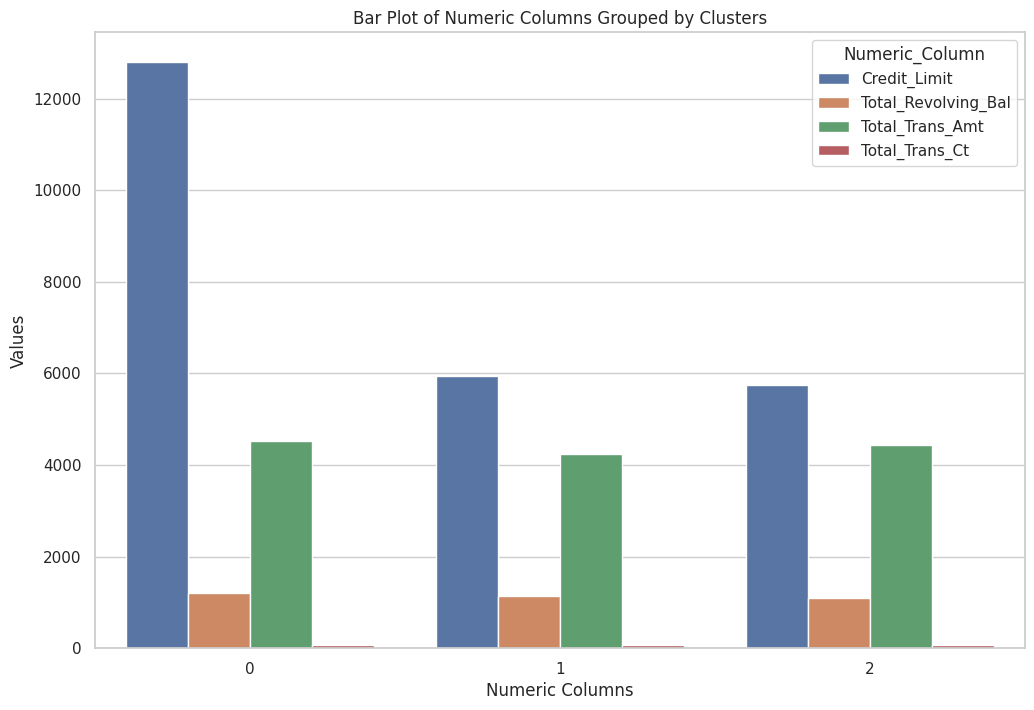

In [ ]:
numeric_df = df[numeric_columns + ['Cluster']]

# Melt the DataFrame to have a single column for both variable and value
melted_df = pd.melt(numeric_df, id_vars='Cluster', var_name='Numeric_Column', value_name='Value')

# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Cluster', y='Value', hue='Numeric_Column', data=melted_df, ci=None)

# Set plot labels and title
plt.xlabel('Numeric Columns')
plt.ylabel('Values')
plt.title('Bar Plot of Numeric Columns Grouped by Clusters')

# Show the plot
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6ad58bc5-59dd-429f-97b6-3cedb5b4fcfc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>